## Calculate MC

This is a script to calculate and visualize the distribution of MC $^{[1]}$

本脚本用于展示如何计算和可视化COCO数据集上MC分数 $^{[1]}$ 的分布

> [1] Hou X, Liu M, Zhang S, et al. Relation DETR: Exploring Explicit Position Relation Prior for Object Detection[J]. arXiv preprint arXiv:2407.11699, 2024.

In [3]:
import json
import multiprocessing
from collections import defaultdict

import numpy as np
from tqdm import tqdm


# calculate mc for each image
def mc(box_per_image: np.ndarray):
    if len(box_per_image) < 2:
        return None
    num_box = len(box_per_image)
    mc = (np.abs(np.corrcoef(box_per_image)).sum() - num_box) / (num_box * (num_box - 1))
    return mc.item()


def coco_mc(coco_ann: str, process: int = 6):
    # load coco annotation from the given file path
    with open(coco_ann, "r") as f:
        ann_dict = json.load(f)

    # collect bbox corresponding to each image
    bbox_per_image = defaultdict(list)
    for annotation in ann_dict["annotations"]:
        boxes = annotation["bbox"]
        bbox_per_image[annotation["image_id"]].append(boxes)

    # use multiprocessing to speed up the calculation of mc
    dataset_mc = tqdm(
        multiprocessing.Pool(processes=process).imap(mc, bbox_per_image.values()),
        total=len(bbox_per_image)
    )
    dataset_mc = [t for t in dataset_mc if t is not None]

    return dataset_mc

In [4]:
# specify your own coco-style annotation file path
dataset_mc = coco_mc("data/coco/annotations/instances_train2017.json")

100%|██████████| 117266/117266 [00:11<00:00, 10552.54it/s]


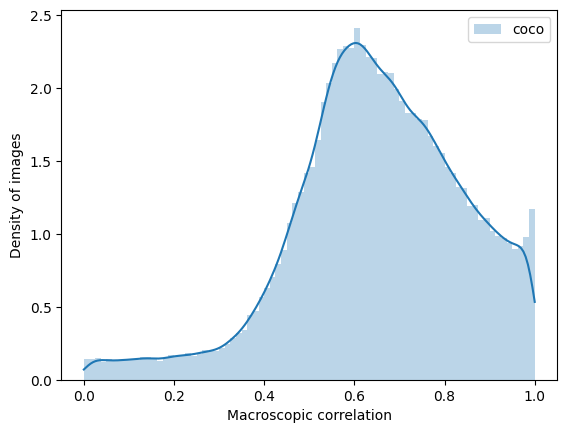

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt


sns.histplot(dataset_mc, stat="density", bins=80, kde=True, alpha=0.3, edgecolor=None, label="coco")
plt.legend()
plt.xlabel("Macroscopic correlation")
plt.ylabel("Density of images")
plt.show()